In [1]:
#Importing necessery libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import csv
import warnings
from scipy import stats
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib as mpl

warnings.filterwarnings('ignore')

In [2]:
#importing data

df = pd.read_csv("D:/Internship/Data Glacier/Cross Selling/Test.csv")


In [3]:
df.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [4]:
df.shape

(929615, 24)

In [5]:
#translating from spanish to english

dict = {'fecha_dato' : 'Date',
       'ncodpers' : 'Customer_Code',
       'ind_empleado' : 'Employee_Index',
       'pais_residencia' : 'Country',
       'sexo' : 'Gender',
       'age' : 'Age',
       'fecha_alta' : 'Customer_Join_Date',
       'ind_nuevo' : 'Customer_Index',
       'antiguedad' : 'Customer_Seniority',
       'indrel' : 'Primary_Customer',
       'ult_fec_cli_1t' : 'Customer_Leave_Date',
       'indrel_1mes' : 'Customer_Type',
       'tiprel_1mes' : 'Customer_Relation',
       'indresi' : 'Residence_Index',
       'indext' : 'Foriegner_Index',
       'conyuemp' : 'Spouse_Index',
       'canal_entrada' : 'Channel_Used',
       'indfall' : 'Deceased_Index',
       'tipodom' : 'Primary_Address',
       'cod_prov' : 'Customer_Address',
       'nomprov' : 'Province',
       'ind_actividad_cliente' : 'Activity_Index',
       'renta' : 'Gross_Income',
       'segmento' : 'Segmentation',
       'ind_ahor_fin_ult1' : 'Saving_Account',
        'ind_aval_fin_ult1' : 'Guarantees',
        'ind_cco_fin_ult1' : 'Current_Accounts',
        'ind_cder_fin_ult1' : 'Derivative_Account',
        'ind_cno_fin_ult1' : 'Payroll_Account',
        'ind_ctju_fin_ult1' : 'Junior_Account',
        'ind_ctma_fin_ult1' : 'More_Private_Account',
        'ind_ctop_fin_ult1' : 'Private_Account',
        'ind_ctpp_fin_ult1' : 'Private_Plus_Account',
        'ind_deco_fin_ult1' : 'Short_Term_Deposits',
        'ind_deme_fin_ult1' : 'Medium_Term_Deposits',
        'ind_dela_fin_ult1' : 'Long_Term_Deposits',
        'ind_ecue_fin_ult1' : 'E_Account',
        'ind_fond_fin_ult1' : 'Funds',
        'ind_hip_fin_ult1' : 'Mortgage',
        'ind_plan_fin_ult1' : 'Pensions',
        'ind_pres_fin_ult1' : 'Loans',
        'ind_reca_fin_ult1' : 'Taxes',
        'ind_tjcr_fin_ult1' : 'Credit_Card',
        'ind_valo_fin_ult1' : 'Securities',
        'ind_viv_fin_ult1' : 'Home_Account',
        'ind_nomina_ult1' : 'Payroll',
        'ind_nom_pens_ult1' : 'Pensions2',
        'ind_recibo_ult1' : 'Direct_Debit'
       }

df = df.rename(columns = dict)
df1=df

In [6]:
df.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,...,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 929615 non-null  object 
 1   Customer_Code        929615 non-null  int64  
 2   Employee_Index       929615 non-null  object 
 3   Country              929615 non-null  object 
 4   Gender               929610 non-null  object 
 5   Age                  929615 non-null  int64  
 6   Customer_Join_Date   929615 non-null  object 
 7   Customer_Index       929615 non-null  int64  
 8   Customer_Seniority   929615 non-null  int64  
 9   Primary_Customer     929615 non-null  int64  
 10  Customer_Leave_Date  1683 non-null    object 
 11  Customer_Type        929592 non-null  float64
 12  Customer_Relation    929592 non-null  object 
 13  Residence_Index      929615 non-null  object 
 14  Foriegner_Index      929615 non-null  object 
 15  Spouse_Index     

In [8]:
#changing datatypes

for column in ["Employee_Index", "Country", "Gender"]:
    df[column] = df[column].astype('category')

In [9]:
for column in ["Date", "Customer_Join_Date", "Customer_Leave_Date"]:
    df[column] = df[column].astype('datetime64[ns]')

In [10]:
print(df['Customer_Leave_Date'].value_counts(dropna = False))

NaT           927932
2016-06-01       138
2016-06-10       133
2016-06-03       110
2016-06-07       102
2016-06-06       101
2016-06-13        84
2016-06-20        84
2016-06-15        78
2016-06-17        78
2016-06-23        78
2016-06-14        76
2016-06-02        75
2016-06-09        75
2016-06-22        72
2016-06-21        70
2016-06-24        64
2016-06-16        62
2016-06-08        60
2016-06-27        58
2016-06-28        49
2016-06-29        36
Name: Customer_Leave_Date, dtype: int64


In [11]:
#updating customer leave date
end = pd.to_datetime('2016-05-28')
df['Customer_Leave_Date'] = df['Customer_Leave_Date'].fillna(end)

In [12]:
print(df['Customer_Leave_Date'].value_counts(dropna = False))

2016-05-28    927932
2016-06-01       138
2016-06-10       133
2016-06-03       110
2016-06-07       102
2016-06-06       101
2016-06-13        84
2016-06-20        84
2016-06-15        78
2016-06-17        78
2016-06-23        78
2016-06-14        76
2016-06-02        75
2016-06-09        75
2016-06-22        72
2016-06-21        70
2016-06-24        64
2016-06-16        62
2016-06-08        60
2016-06-27        58
2016-06-28        49
2016-06-29        36
Name: Customer_Leave_Date, dtype: int64


In [13]:
#Removing all the rows with NA values

df.isna().any()


Date                   False
Customer_Code          False
Employee_Index         False
Country                False
Gender                  True
Age                    False
Customer_Join_Date     False
Customer_Index         False
Customer_Seniority     False
Primary_Customer       False
Customer_Leave_Date    False
Customer_Type           True
Customer_Relation       True
Residence_Index        False
Foriegner_Index        False
Spouse_Index            True
Channel_Used            True
Deceased_Index         False
Primary_Address        False
Customer_Address        True
Province                True
Activity_Index         False
Gross_Income           False
Segmentation            True
dtype: bool

In [14]:
print(df['Gender'].value_counts(dropna = False))

V      504515
H      425095
NaN         5
Name: Gender, dtype: int64


In [15]:
from random import choice

mask = df["Gender"].isna()

df.loc[mask,["Gender"]] = df.loc[mask,["Gender"]].applymap(lambda _: choice(["V","H"]))

In [16]:
print(df['Gender'].value_counts(dropna = False))


V    504518
H    425097
Name: Gender, dtype: int64


In [17]:
df = df.replace({'Gender':{'H':'Male', 'V': 'Female'}})

In [18]:
print(df['Customer_Type'].value_counts(dropna = False))

1.0    929565
3.0        27
NaN        23
Name: Customer_Type, dtype: int64


In [19]:
df = df.dropna(subset = ['Customer_Type'])

In [20]:
df = df.astype(object).replace({'Customer_Type':{1.0:'Primary Customer', 1: 'Primary Customer', 2.0: 'Co-Owner', 2: 'Co-Owner', 3.0: 'Former Primary Customer', 3: 'Former Primary Customer', 4.0: 'Former Co-Owner', 4: 'Former Co-Owner', 'P': 'Potential Customer'}})
plot = df['Customer_Type'].value_counts()
plot

Primary Customer           929565
Former Primary Customer        27
Name: Customer_Type, dtype: int64

In [21]:
plot.to_csv('Customer Type.csv')

In [22]:
print(df['Customer_Relation'].value_counts(dropna = False))

I    535943
A    393622
P        27
Name: Customer_Relation, dtype: int64


In [23]:
df = df.replace({'Customer_Relation':{'I': 'Inactive', 'A': 'Active', 'P': 'Former Customer', 'R': 'Potential'}})

In [24]:
relation = df['Customer_Relation'].value_counts(dropna = False)
relation

Inactive           535943
Active             393622
Former Customer        27
Name: Customer_Relation, dtype: int64

In [25]:
relation.to_csv('Customer Relation.csv')

In [26]:
print(df['Spouse_Index'].value_counts(dropna = False))

NaN    929488
N         103
S           1
Name: Spouse_Index, dtype: int64


In [27]:
df['Spouse_Index'] = df['Spouse_Index'].fillna(0)

In [28]:
df = df.replace({'Spouse_Index':{0: 'Not Applicable', 'N': 'No', 'S': 'Yes'}})

In [29]:
print(df['Spouse_Index'].value_counts(dropna = False))

Not Applicable    929488
No                   103
Yes                    1
Name: Spouse_Index, dtype: int64


In [30]:
print(df['Channel_Used'].value_counts(dropna = False))

KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33362
        ...  
KDB         1
KGN         1
025         1
KHR         1
KDL         1
Name: Channel_Used, Length: 163, dtype: int64


In [31]:
print(df['Primary_Address'].value_counts(dropna = False))


1    929592
Name: Primary_Address, dtype: int64


In [32]:
df['Customer_Address'].fillna(np.random.randint(1.0, 50.0))

0         28.0
1          3.0
2         15.0
3          8.0
4          7.0
          ... 
929610    28.0
929611    26.0
929612    33.0
929613    33.0
929614    45.0
Name: Customer_Address, Length: 929592, dtype: float64

In [33]:
print(df['Customer_Address'].value_counts(dropna = False))

28.0    298246
8.0      88574
46.0     47995
41.0     40492
15.0     28715
30.0     27752
29.0     24545
50.0     23160
3.0      22146
11.0     19794
36.0     18961
33.0     18300
35.0     16332
47.0     16018
6.0      12936
45.0     12655
48.0     12493
18.0     12392
37.0     11070
39.0     10824
14.0      9831
7.0       9130
10.0      8598
13.0      8075
21.0      8018
2.0       7780
43.0      7631
12.0      7144
9.0       6645
17.0      6304
31.0      6010
26.0      5806
24.0      5716
27.0      5656
32.0      5605
25.0      5430
38.0      5095
20.0      4869
19.0      4678
23.0      4496
4.0       4306
NaN       3996
16.0      3788
49.0      3430
34.0      3311
40.0      2881
22.0      2789
5.0       2628
1.0       2591
44.0      1538
42.0      1261
52.0       643
51.0       513
Name: Customer_Address, dtype: int64


In [34]:
df = df.dropna(subset = ['Customer_Address'])

In [35]:
province = df['Province'].value_counts(dropna = False)
province

MADRID                    298246
BARCELONA                  88574
VALENCIA                   47995
SEVILLA                    40492
CORUÑA, A                  28715
MURCIA                     27752
MALAGA                     24545
ZARAGOZA                   23160
ALICANTE                   22146
CADIZ                      19794
PONTEVEDRA                 18961
ASTURIAS                   18300
PALMAS, LAS                16332
VALLADOLID                 16018
BADAJOZ                    12936
TOLEDO                     12655
BIZKAIA                    12493
GRANADA                    12392
SALAMANCA                  11070
CANTABRIA                  10824
CORDOBA                     9831
BALEARS, ILLES              9130
CACERES                     8598
CIUDAD REAL                 8075
HUELVA                      8018
ALBACETE                    7780
TARRAGONA                   7631
CASTELLON                   7144
BURGOS                      6645
GIRONA                      6304
NAVARRA   

In [36]:
province.to_csv('Province.csv')

In [37]:
#dropping duplicates 
df = df.drop_duplicates(subset='Customer_Code', keep="last")

In [38]:
df.reset_index(inplace=True)

In [39]:
df = df.drop('index', axis = 1)

In [40]:
#there is an outlier with Employee Index 'S', that does not exist. 
df.loc[df['Employee_Index'] == 'S']

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,...,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation
892709,2016-06-28 00:00:00,720152,S,ES,Male,39,2007-09-21 00:00:00,0,105,1,...,N,Not Applicable,KAT,N,1,28.0,MADRID,1,87798.24,01 - TOP


In [41]:
i = df.loc[df['Employee_Index'] == 'S'].index
df = df.drop(i)

In [42]:
#renaming values

df = df.replace({'Employee_Index':{'N':'Not An Employee', 'A': 'Active Employee', 'B': 'Ex Employee', 'F': 'Employee Relative'}})
plot2 = df['Employee_Index'].value_counts()
plot2

Not An Employee      925079
Ex Employee             217
Employee Relative       152
Active Employee         147
Name: Employee_Index, dtype: int64

In [43]:
plot2.to_csv('Employee Index.csv')

In [44]:
print(df['Activity_Index'].value_counts(dropna = False))

0    532434
1    393161
Name: Activity_Index, dtype: int64


In [45]:
df = df.replace({'Activity_Index':{0.0: 'Inactive Customer', 1.0: 'Active Customer'}})

In [46]:
print(df['Segmentation'].value_counts(dropna = False))

02 - PARTICULARES     541881
03 - UNIVERSITARIO    345739
01 - TOP               35748
NaN                     2227
Name: Segmentation, dtype: int64


In [47]:
df = df.replace({'Segmentation':{'01 - TOP': 'VIP', '02 - PARTICULARES': 'Individuals', '03 - UNIVERSITARIO': 'College Graduate'}})

In [48]:
print(df['Segmentation'].value_counts(dropna = False))

Individuals         541881
College Graduate    345739
VIP                  35748
NaN                   2227
Name: Segmentation, dtype: int64


In [49]:
from random import choice

mask = df["Segmentation"].isna()

df.loc[mask,["Segmentation"]] = df.loc[mask,["Segmentation"]].applymap(lambda _: choice(["Individuals","College Graduate", "VIP"]))

In [50]:
segmentation = df['Segmentation'].value_counts(dropna = False)
segmentation

Individuals         542649
College Graduate    346447
VIP                  36499
Name: Segmentation, dtype: int64

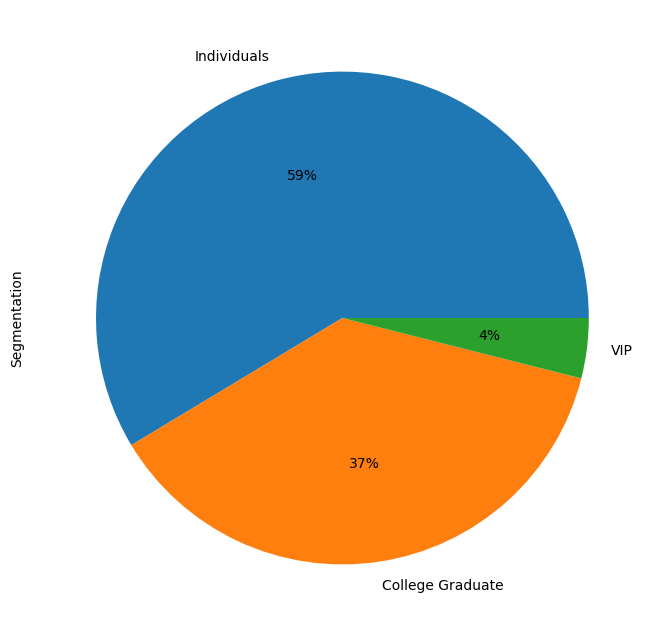

In [51]:
segmentation.plot.pie(y = segmentation.index, figsize=(8,8), autopct='%.0f%%')
plt.show() 

In [52]:
print(df['Customer_Index'].value_counts(dropna = False))


0    899734
1     25861
Name: Customer_Index, dtype: int64


In [53]:
df = df.replace({'Customer_Index':{0.0: 'Old_Customer', 1.0: 'New_Customer'}})

In [54]:
plot3 = df['Customer_Index'].value_counts()
plot3

Old_Customer    899734
New_Customer     25861
Name: Customer_Index, dtype: int64

In [55]:
plot3.to_csv('Customer Index.csv')

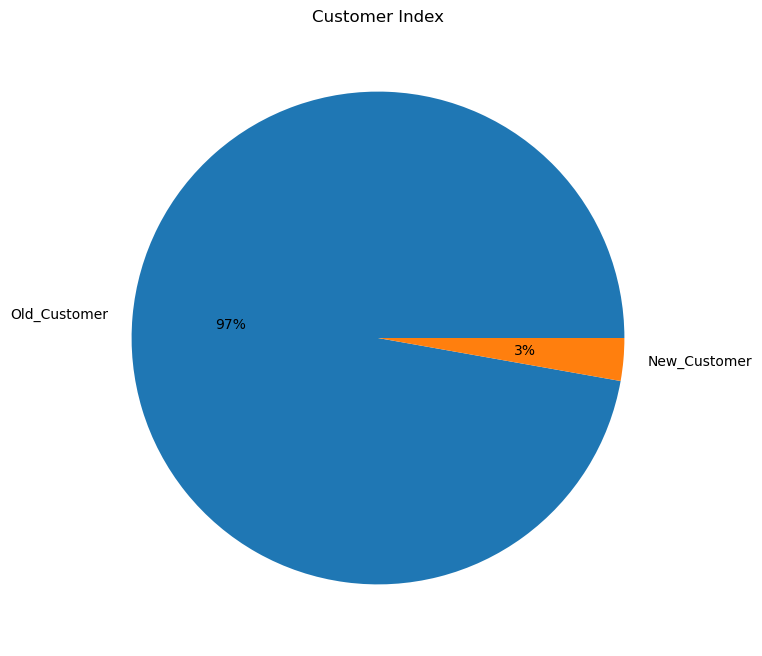

In [56]:
plot3.plot.pie(y = plot3.index, figsize=(8,8), title = 'Customer Index', label = '', autopct='%.0f%%')
plt.show() 

In [57]:
df['Customer_Seniority'] = df['Customer_Seniority'].astype('int')

In [58]:
print(df['Customer_Seniority'].value_counts(dropna = False))

 8         26332
 32        23414
 9         22969
 20        21105
 11        20419
           ...  
 0           129
 257         102
 255          84
 256          77
-999999        3
Name: Customer_Seniority, Length: 259, dtype: int64


In [59]:
df = df.replace({'Customer_Seniority':{-999999: 1}})

In [60]:
seniority = df['Customer_Seniority'].value_counts(dropna = False)
seniority

8      26332
32     23414
9      22969
20     21105
11     20419
       ...  
254      150
0        129
257      102
255       84
256       77
Name: Customer_Seniority, Length: 258, dtype: int64

In [61]:
seniority.to_csv('Seniority.csv')

In [62]:
print(df['Primary_Customer'].value_counts(dropna = False))


1     923915
99      1680
Name: Primary_Customer, dtype: int64


In [63]:
print(df['Residence_Index'].value_counts(dropna = False))

S    925590
N         5
Name: Residence_Index, dtype: int64


In [64]:
df = df.replace({'Residence_Index':{'S': 'Yes', 'N': 'No'}})

In [65]:
residence = df['Residence_Index'].value_counts(dropna = False)
residence

Yes    925590
No          5
Name: Residence_Index, dtype: int64

In [66]:
print(df['Foriegner_Index'].value_counts(dropna = False))

N    882696
S     42899
Name: Foriegner_Index, dtype: int64


In [67]:
df = df.replace({'Foriegner_Index':{'S': 'Yes', 'N': 'No'}})

In [68]:
print(df['Foriegner_Index'].value_counts(dropna = False))

No     882696
Yes     42899
Name: Foriegner_Index, dtype: int64


In [69]:
print(df['Spouse_Index'].value_counts(dropna = False))

Not Applicable    925491
No                   103
Yes                    1
Name: Spouse_Index, dtype: int64


In [70]:
df['Spouse_Index'] = df['Spouse_Index'].fillna(0)

In [71]:
df = df.replace({'Spouse_Index':{0: 'Not Applicable', 'N': 'No', 'S': 'Yes'}})

In [72]:
print(df['Spouse_Index'].value_counts(dropna = False))

Not Applicable    925491
No                   103
Yes                    1
Name: Spouse_Index, dtype: int64


In [73]:
print(df['Deceased_Index'].value_counts(dropna = False))

N    923208
S      2387
Name: Deceased_Index, dtype: int64


In [74]:
df = df.replace({'Deceased_Index':{'S': 'Yes', 'N': 'No'}})

In [75]:
print(df['Deceased_Index'].value_counts(dropna = False))

No     923208
Yes      2387
Name: Deceased_Index, dtype: int64


In [76]:
#cleaned data
df.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,...,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation
0,2016-06-28 00:00:00,15889,Employee Relative,ES,Female,56,1995-01-16 00:00:00,Old_Customer,256,1,...,No,No,KAT,No,1,28.0,MADRID,Active Customer,326124.90,VIP
1,2016-06-28 00:00:00,1170544,Not An Employee,ES,Male,36,2013-08-28 00:00:00,Old_Customer,34,1,...,No,Not Applicable,KAT,No,1,3.0,ALICANTE,Inactive Customer,NA,Individuals
2,2016-06-28 00:00:00,1170545,Not An Employee,ES,Female,22,2013-08-28 00:00:00,Old_Customer,34,1,...,No,Not Applicable,KHE,No,1,15.0,"CORUÑA, A",Active Customer,NA,College Graduate
3,2016-06-28 00:00:00,1170547,Not An Employee,ES,Male,22,2013-08-28 00:00:00,Old_Customer,34,1,...,No,Not Applicable,KHE,No,1,8.0,BARCELONA,Inactive Customer,148402.98,College Graduate
4,2016-06-28 00:00:00,1170548,Not An Employee,ES,Male,22,2013-08-28 00:00:00,Old_Customer,34,1,...,No,Not Applicable,KHE,No,1,7.0,"BALEARS, ILLES",Inactive Customer,106885.80,College Graduate


In [77]:
df.shape

(925595, 24)

In [78]:
df1.describe()

,Customer_Code,Age,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Primary_Address,Customer_Address,Activity_Index
count,9.296150e+05,929615.000000,929615.000000,929615.000000,929615.000000,929592.000000,929615.0,925619.000000,929615.000000
mean,8.794566e+05,40.249821,0.027849,77.728413,1.177422,1.000058,1.0,26.546150,0.425272
std,4.481569e+05,17.185119,0.164541,1797.824518,4.166039,0.010779,0.0,12.836614,0.494384
min,1.588900e+04,2.000000,0.000000,-999999.000000,1.000000,1.000000,1.0,1.000000,0.000000
25%,4.833615e+05,25.000000,0.000000,23.000000,1.000000,1.000000,1.0,15.000000,0.000000
50%,9.664250e+05,39.000000,0.000000,55.000000,1.000000,1.000000,1.0,28.000000,0.000000
75%,1.264316e+06,51.000000,0.000000,136.000000,1.000000,1.000000,1.0,35.000000,1.000000
max,1.553689e+06,164.000000,1.000000,257.000000,99.000000,3.000000,1.0,52.000000,1.000000


In [79]:
plot4 = df['Activity_Index'].value_counts(dropna = False)
plot4

Inactive Customer    532434
Active Customer      393161
Name: Activity_Index, dtype: int64

In [80]:
plot4.to_csv('Activity Index.csv')

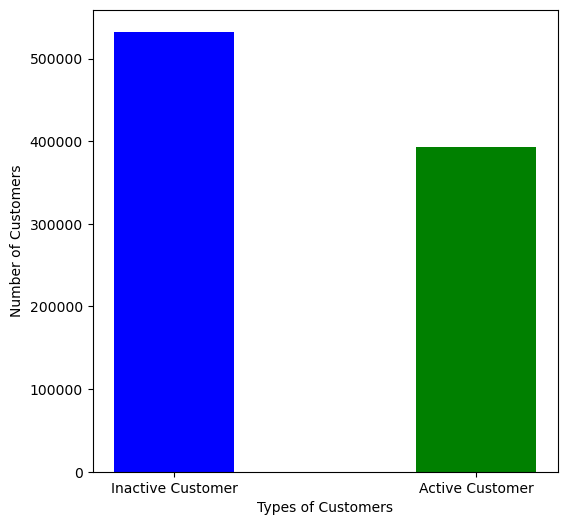

In [81]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(plot4.index, plot4.values, width=0.4, color = ['Blue', 'Green'])
plt.ylabel('Number of Customers')
plt.xlabel('Types of Customers')
plt.show()

In [82]:
gender = df['Gender'].value_counts(dropna = False)
gender

Female    501976
Male      423619
Name: Gender, dtype: int64

In [83]:
gender.to_csv('Gender.csv')

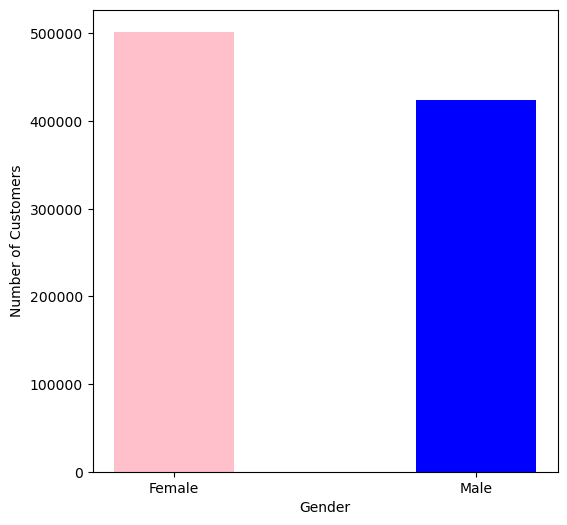

In [84]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(gender.index, gender.values, width=0.4, color = ['Pink', 'Blue'])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
axes.legend
plt.show()

In [85]:
#top 10 channels

channel = df['Channel_Used'].value_counts()
channel = channel.sort_values(ascending = False)
channel = channel[:10]
channel

KHE    251397
KAT    204277
KFC    200157
KHQ     74969
KHM     33353
KFA     25037
KHN     18129
KHK     16913
KHD      7333
RED      6285
Name: Channel_Used, dtype: int64

In [86]:
channel.to_csv('Channels.csv')

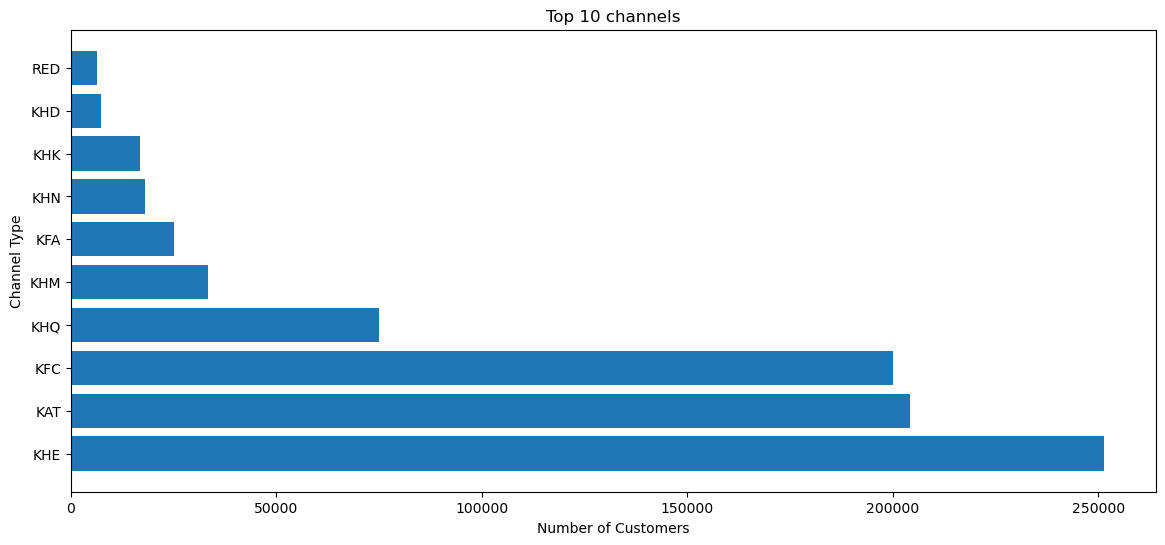

In [87]:
fig, axes = plt.subplots(figsize = (14,6))
axes.barh(channel.index, channel.values)
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers')
axes.set_title('Top 10 channels')
axes.legend
plt.show()

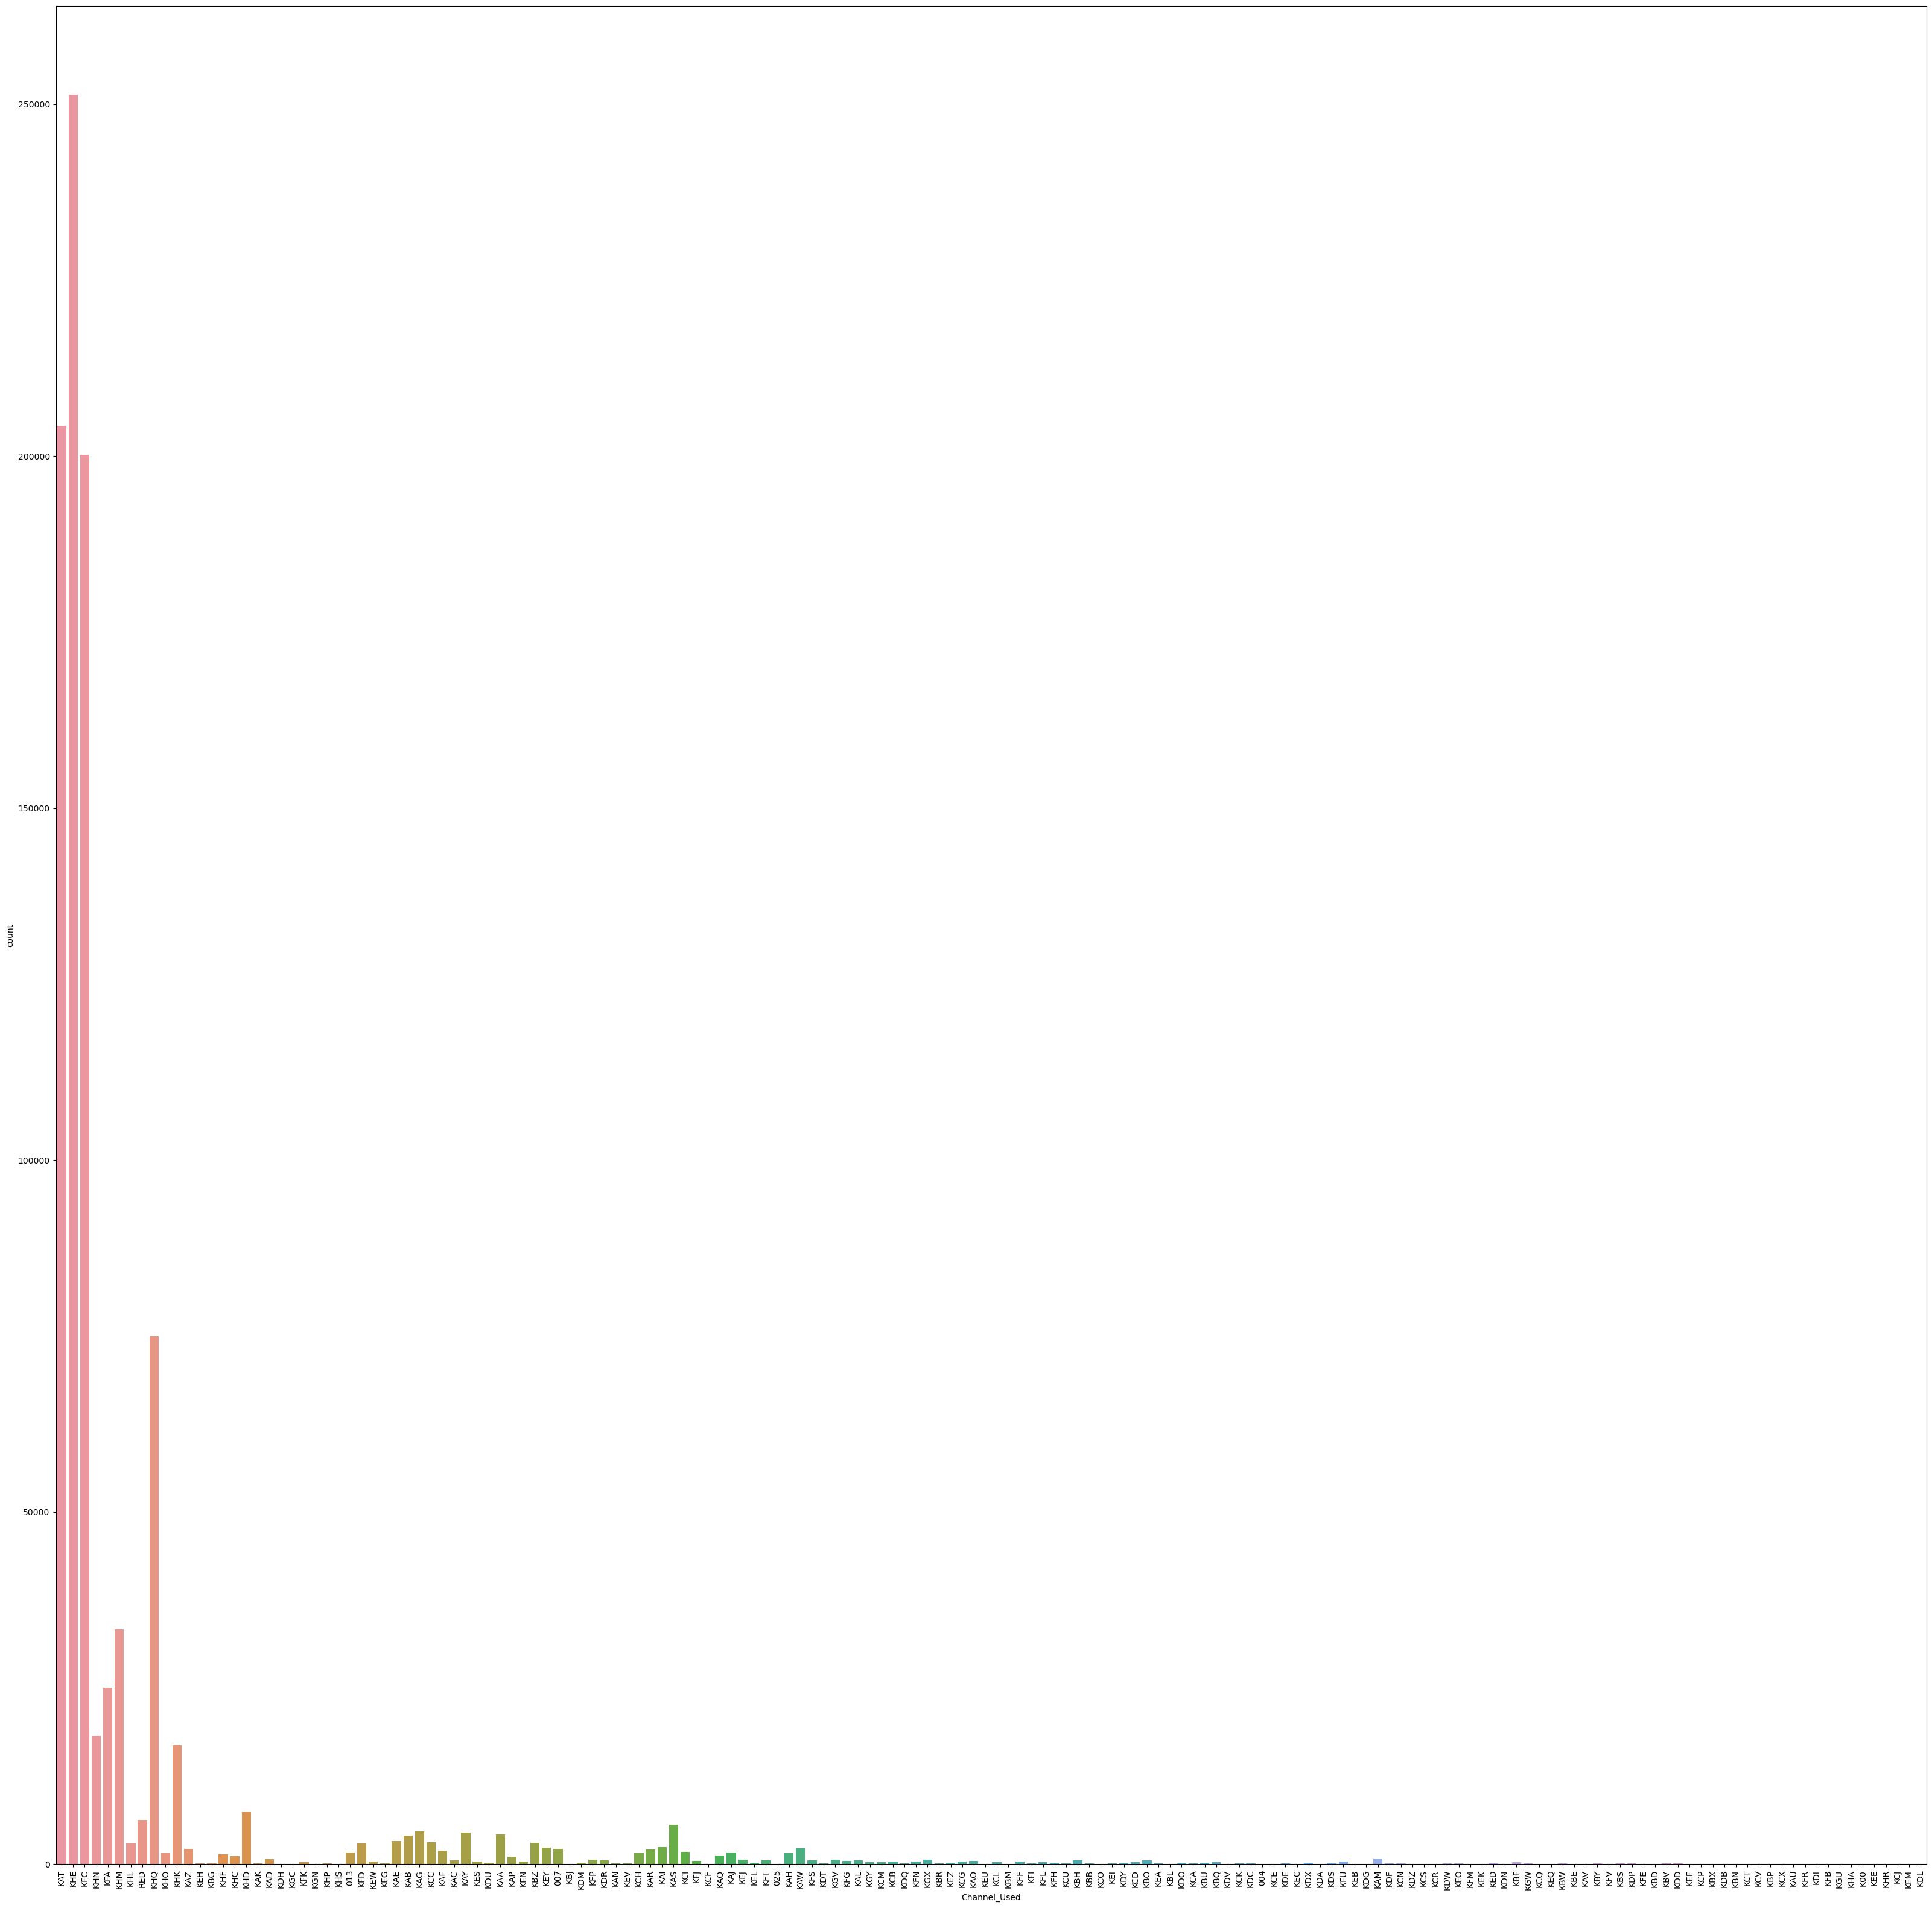

In [93]:
plt.figure(figsize=(40,40))
barplot = sns.countplot(x = 'Channel_Used' , data = df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Customer_Seniority', ylabel='count'>

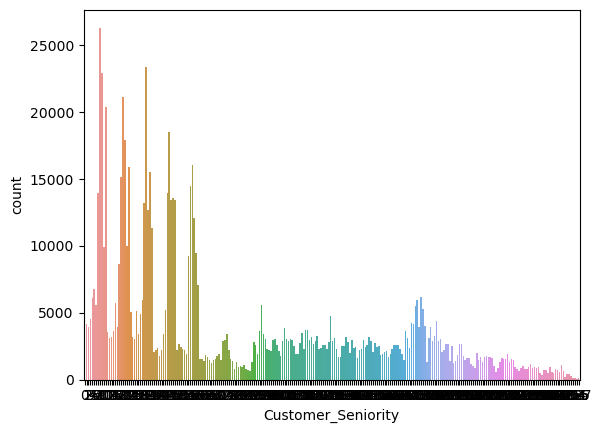

In [89]:

sns.countplot(x = 'Customer_Seniority', data = df)

<AxesSubplot:>

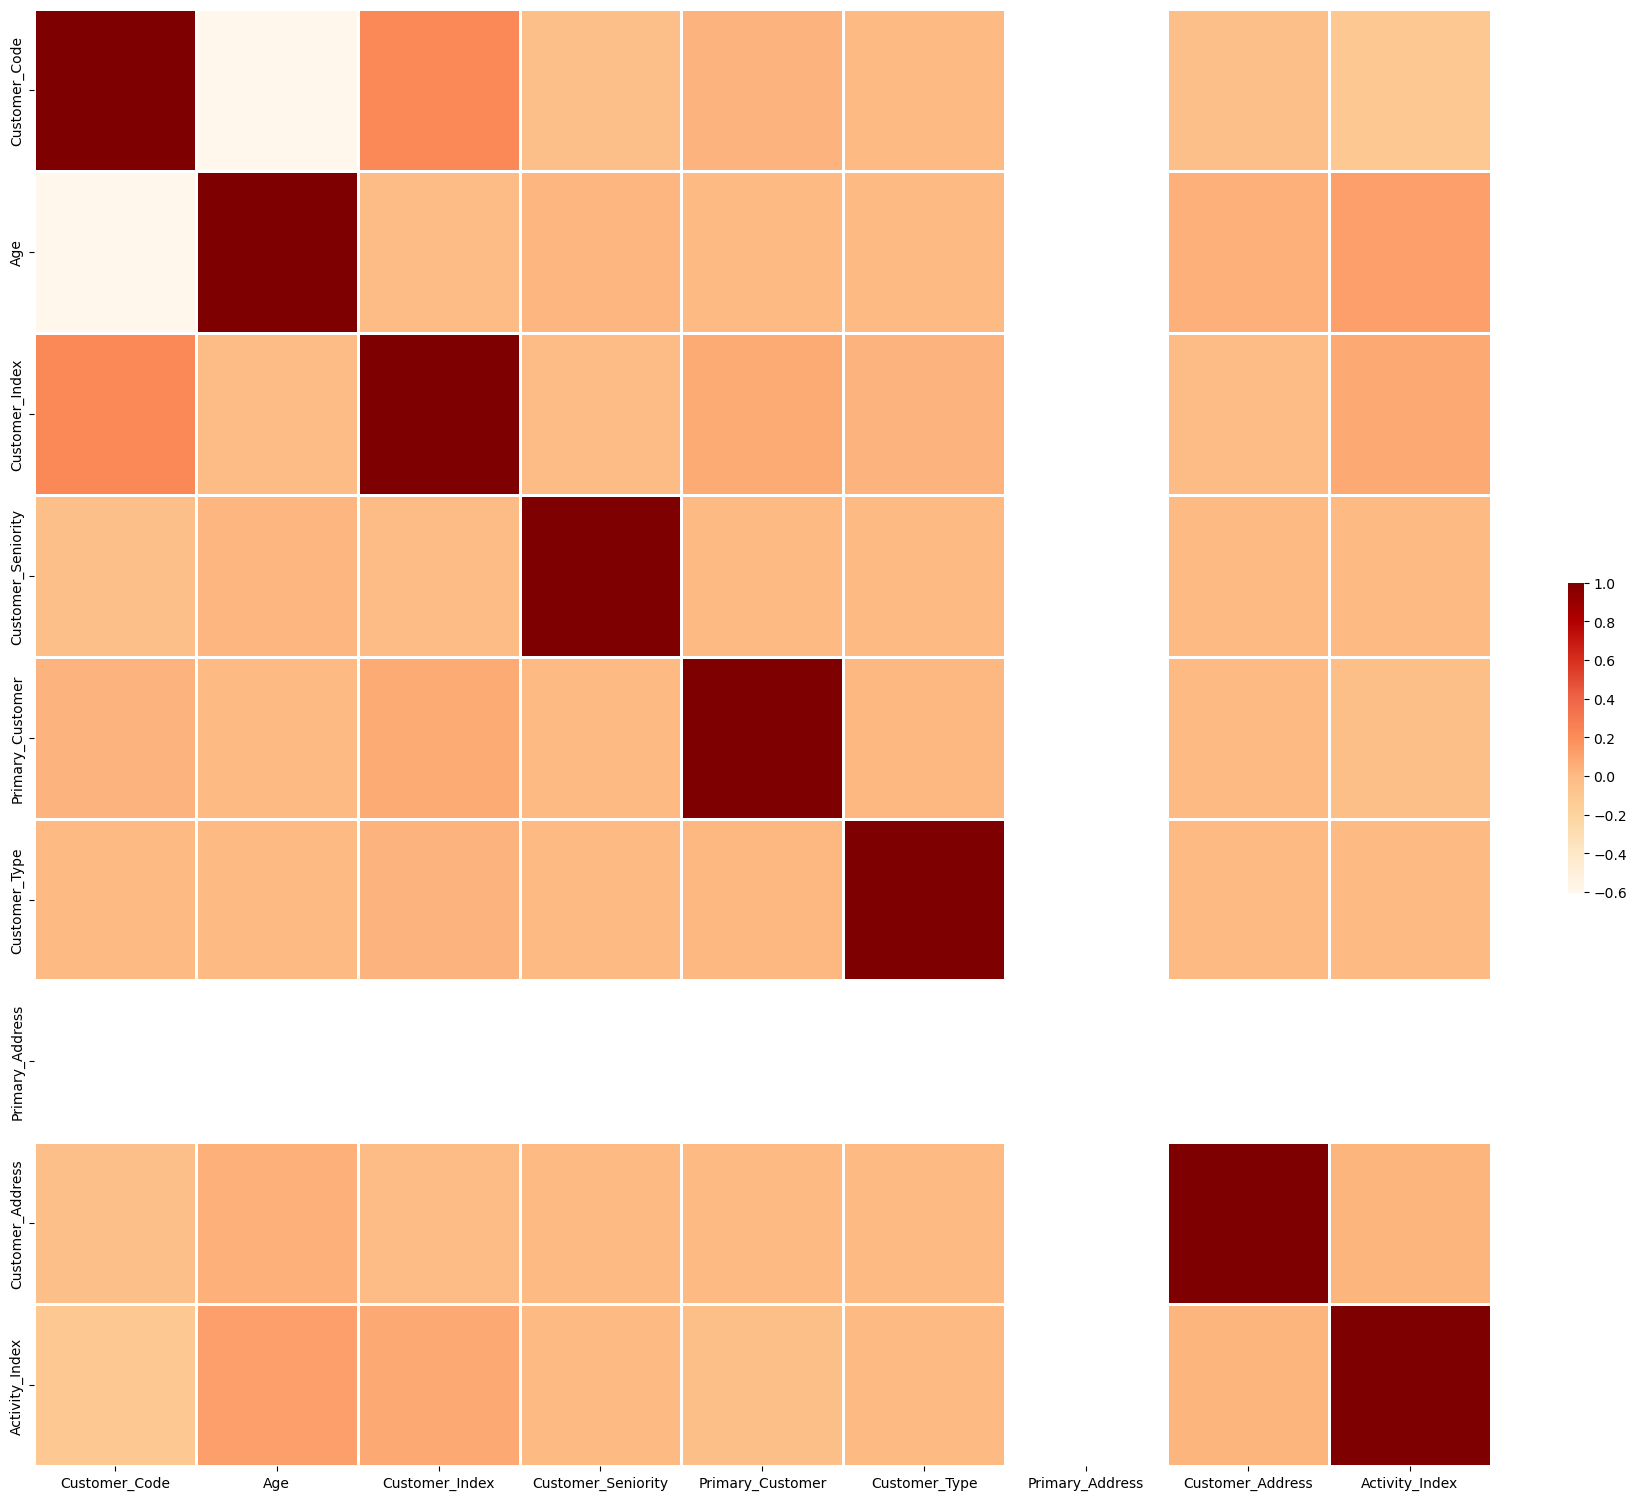

In [94]:
# calculate correlation matrix
#cols = ["customer_code", "employee_index", "sex", "age", "gross_income", "residence_index"]
corr = df1.corr()#plot the heatmap

# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(
    corr, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)
